# BROADBAND OUTAGE DETECTION ANALYSIS

# Project Objectives
Broadband outage problem is one of the biggest problems now days. 
As we know that Broadband Operatores strive to provide the best possible service to customers and broadband outages are taken
very seriously as they effect user experience and also impact the Business revenue.


# Problem Statement  

The goal of this project is to " predict the outage duration " based on the reports filled by operators.
Along with this, we will also discover important variables helpful in detecting outage duration.
we are required to predict the outage duration (ranging from 0 to 2) for the test data. 
outage duration of 0 means `0` for no outage, `1` for short outages that last anywhere between a few minutes and a maximum
of 2 hours, and `2` for long outages that can last from 2 hours to sometimes even a couple



# Introduction to the Dataset 
For the purpose of this project, we are considering
There are 5 CSV files provided to us, they are described below:

**A) Train Data** 

This data provides insights about unique event `id` for each observation of the `outage_duration` in a particular `area_code`

**B) Broadband Data**

This data provides details about the 10 different types of broadbands.

**C) Outage Data**

There are 5 different outage_type recorded in the dataset.

**D) Report Data**

This data contains log_report_type is a type of the recorded report generated by a technical team member after evaluating the 
outage. volume is the volume of data handled in the area at the time of report in custom company specific units

**E) Server Data**

This data contains the record of the`transit_server_type` that is stored in the dataset. Transit Servers handle the
requests and responses of the customers.

#  Importing required packages 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as sct
import pylab
%matplotlib inline

# Loading the datasets

In [3]:
# Load Train Dataset
import os
os.chdir("C:/Users/Gunjan/Downloads/20200628_CSE9099c_PHD_Dataset-1593175193570/data")
train = pd.read_csv("train_data.csv")
train_broadband_data = pd.read_csv("broadband_data.csv")
train_outage_data = pd.read_csv("outage_data.csv")
train_report_data = pd.read_csv("report_data.csv")
train_server_data = pd.read_csv("server_data.csv")

In [4]:
## Lets Check Shape of datasets 

print('Shape of train data :',train.shape)
print('Shape of train_broadband data :',train_broadband_data.shape)
print('Shape of train_outage data :',train_outage_data.shape)
print('Shape of train_report data :',train_report_data.shape)
print('Shape of train_server data :',train_server_data.shape)

Shape of train data : (5904, 3)
Shape of train_broadband data : (21076, 2)
Shape of train_outage data : (18552, 2)
Shape of train_report data : (58671, 3)
Shape of train_server data : (31170, 2)


## Basic Data Understanding

### Train and Test Data Understanding  

In [5]:
## Lets check shape of Train and Test Data

print('train Sample:\n',train.head(2),'\n')
print('broadband Sample:\n', train_broadband_data.head(2), '\n')
print('outage Sample:\n', train_outage_data.head(2), '\n')
print('report Sample:\n', train_report_data.head(2), '\n')
print('server Sample:\n', train_server_data.head(2), '\n')

#print('\n Test Shape:',Test.shape,'\n')
#print('Test Sample: \n',Test.head(2))

train Sample:
       id area_code  outage_duration
0  13366  area_415                1
1   6783  area_474                0 

broadband Sample:
      id    broadband_type
0  6597  broadband_type_8
1  8011  broadband_type_8 

outage Sample:
      id    outage_type
0  6597  outage_type_2
1  8011  outage_type_2 

report Sample:
      id     log_report_type  volume
0  6597  log_report_type_68       6
1  8011  log_report_type_68       7 

server Sample:
      id     transit_server_type
0  6597  transit_server_type_11
1  8011  transit_server_type_15 



In [6]:
## Lets check the missing value in data
print('\n Total missing values in train :',train.isna().sum().sum())
print('\n Total missing values in broadband :',train_broadband_data.isna().sum().sum())
print('\n Total missing values in outage :',train_outage_data.isna().sum().sum())
print('\n Total missing values in report :',train_report_data.isna().sum().sum())
print('\n Total missing values in server :',train_server_data.isna().sum().sum())


 Total missing values in train : 0

 Total missing values in broadband : 0

 Total missing values in outage : 0

 Total missing values in report : 0

 Total missing values in server : 0


## Distribution of outage duration in the train data

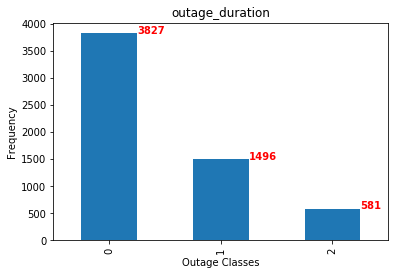

In [7]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 7
%matplotlib inline
bplot_outage = train.outage_duration.value_counts().plot(kind= 'bar')
bplot_outage.set_title("outage_duration")
bplot_outage.set_xlabel("Outage Classes")
bplot_outage.set_ylabel("Frequency")
for i, v in enumerate(train.outage_duration.value_counts()):
    bplot_outage.text(i + 0.25 , v ,str(v), color='red', fontweight='bold')

*** <b>Key Insight </b>-
It's obvious from outage classes that samples with no outage are extremely high that one with outage, Frequency also decreases as outage classes increases. It also gives us an indication that target has class imbalance. 

## Distribution of Broadband Type in the train data

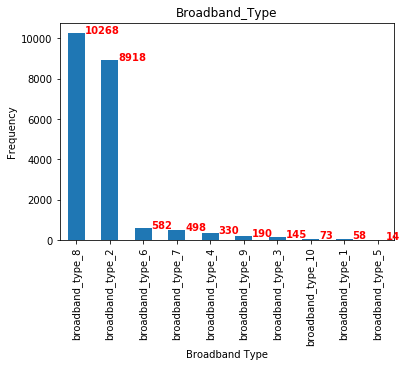

In [8]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25, 10
%matplotlib inline
bplot_broadband = train_broadband_data.broadband_type.value_counts().plot(kind= 'bar')
bplot_broadband.set_title("Broadband_Type")
bplot_broadband.set_xlabel("Broadband Type")
bplot_broadband.set_ylabel("Frequency")
for i, v in enumerate(train_broadband_data.broadband_type.value_counts()):
    bplot_broadband.text(i + 0.25 , v ,str(v), color='red', fontweight='bold')

*** <b>Key Insight </b>-

Broadband type 8 has the highest frequency distribution followed by resource type 2. "ADSL 1" and "ADSL 2" may be most used braodband types and could be most error prone.



## Distribution of Outage type in the train data

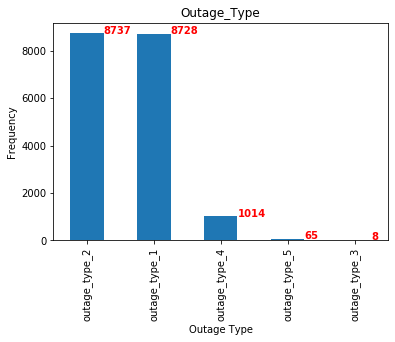

In [9]:
from matplotlib.pylab import rcParams
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline
bplot_Outage_Type = train_outage_data.outage_type.value_counts().plot(kind= 'bar')
bplot_Outage_Type.set_title("Outage_Type")
bplot_Outage_Type.set_xlabel("Outage Type")
bplot_Outage_Type.set_ylabel("Frequency")
for i, v in enumerate(train_outage_data.outage_type.value_counts()):
    bplot_Outage_Type.text(i + 0.25 , v ,str(v), color='red', fontweight='bold')

*** <b>Key Insight </b>-
Outage type 2 and Outage type 1 have extremely large distribution than other. We can consider binning these variables to decreases the skewness.

## Distribution of Server type in the train data

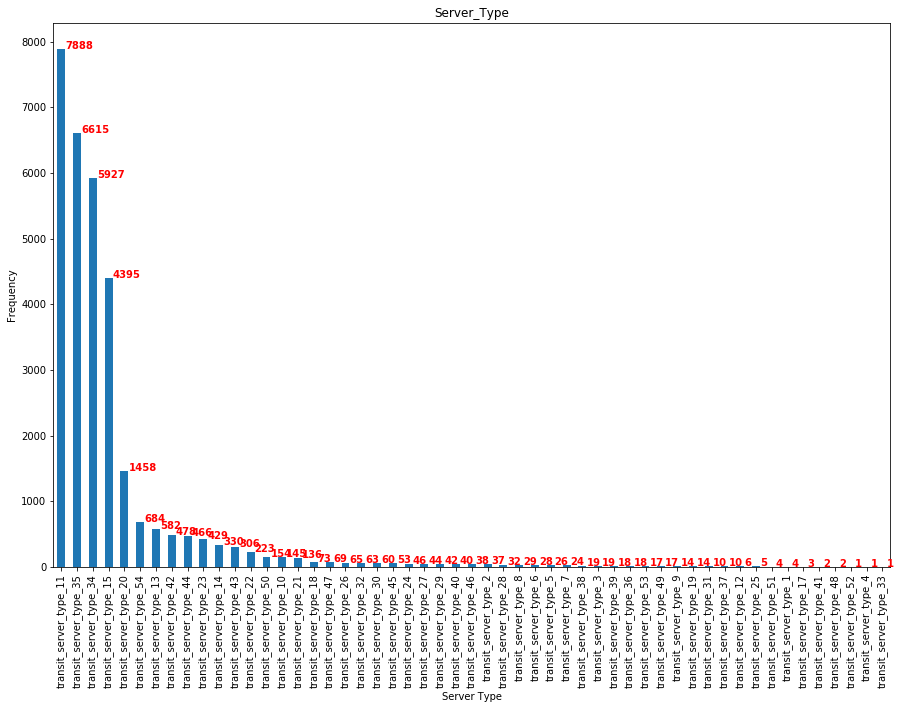

In [10]:
from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 50,50 
#matplotlib.rcParams['figure.figsize'] = (40.0, 20.0)
#%matplotlib inline
bplot_server = train_server_data.transit_server_type.value_counts().plot(kind= 'bar' , figsize= (15.0, 10.0))
bplot_server.set_title("Server_Type")
bplot_server.set_xlabel("Server Type")
bplot_server.set_ylabel("Frequency")
for i, v in enumerate(train_server_data.transit_server_type.value_counts()):
    bplot_server.text(i + 0.25 , v ,str(v), color='red', fontweight='bold')

<b>***Key Insight - </b>
Apart from Type 11,35,34,15 other server types have fairly low frequency distribution and we can bin them into different categories. 11,35 -High 34,15, 20 - Medium and others in Low.

## Questions from operations team-
1. Which areas are most prone to long outage durations?
2. Which broadband types are suspect of long outage durations?
3. Any other recommendations to improve the detection of outage durations.

We will analyze and try to answer these questions by exploring training data sets.

<b>Exploring area and outages from train.csv</b>

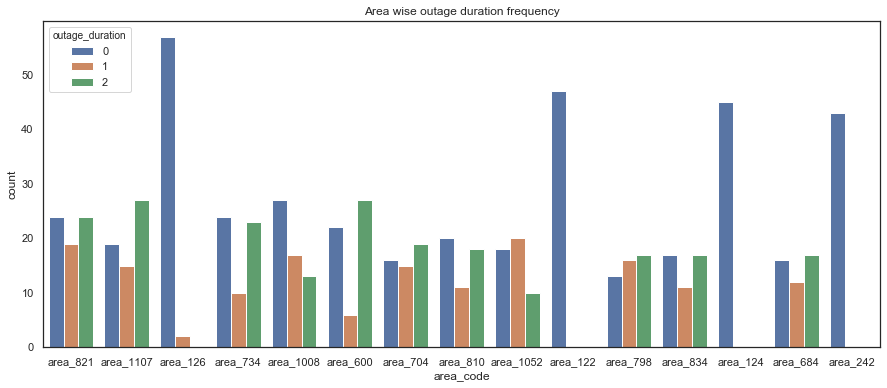

In [11]:
sns.set(rc={'figure.figsize':(15,6)},style='white')

ax=sns.countplot(x='area_code',hue='outage_duration',data=train
              ,order=train.area_code.value_counts().iloc[:15].index)

plt.title('Area wise outage duration frequency')
    
plt.show()

<b>***key insight - </b>
Our data has many areas with 0 outages.

<b>Estimating total outage duration time assuming outage category 1 is for 1 hour and 2 is for more than two hours duration</b>

In [12]:
#calculating total outage duration , grouping with area_code
highest_outage_hours = train.loc[:, train_report_data.columns != 'id']
highest_outage_hours = highest_outage_hours.groupby('area_code',as_index = True , sort = True).sum()
highest_outage_hours = highest_outage_hours.sort_values(by = ['outage_duration'], ascending=[False])
highest_outage_hours[:10]

,outage_duration
area_code,
area_1107,69
area_821,67
area_1100,62
area_600,60
area_734,56
area_704,53
area_798,50
area_810,47
area_684,46


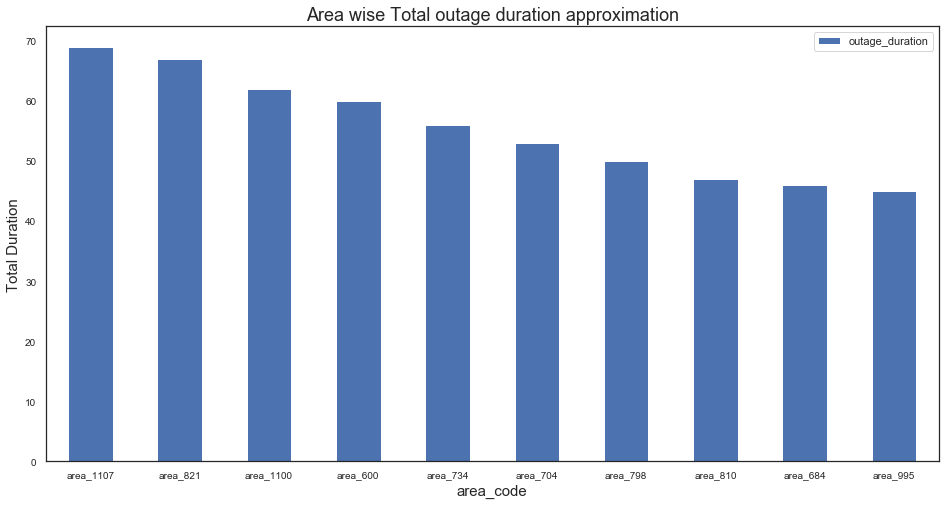

In [13]:
sns.set(rc={'figure.figsize':(50,40)},style='white')
highest_outage_hours[:10].plot(kind = 'bar', rot=0,figsize=(16,8),fontsize=10)
plt.title("Area wise Total outage duration approximation",fontsize=18)
plt.xlabel("area_code",fontsize=15)
plt.ylabel("Total Duration",fontsize=15)
plt.show()

<b>***key insight - </b> Areas 1107,821,1100 and 600 have faced more hour outages duration.

In [14]:
#to answer first question about the areas most prone with long duration outage

In [15]:
#long outage areas
outage_duration_2 = train[train['outage_duration'] == 2].groupby('area_code', sort = True ).count()
#medium outage areas
outage_duration_1 = train[train['outage_duration'] == 1].groupby('area_code', sort = True ).count()
#No outage areas
outage_duration_0 = train[train['outage_duration'] == 0].groupby('area_code', sort = True ).count()
#creating cross tab to understand counts for each outage duration category 
pd.crosstab(train.area_code , train.outage_duration).sort_values(2, ascending = False)



outage_duration,0,1,2
area_code,,,
area_1100,2,6,28
area_1107,19,15,27
area_600,22,6,27
area_821,24,19,24
area_734,24,10,23
...,...,...,...
area_403,1,2,0
area_404,0,3,0
area_405,2,1,0


<Figure size 1440x1080 with 0 Axes>

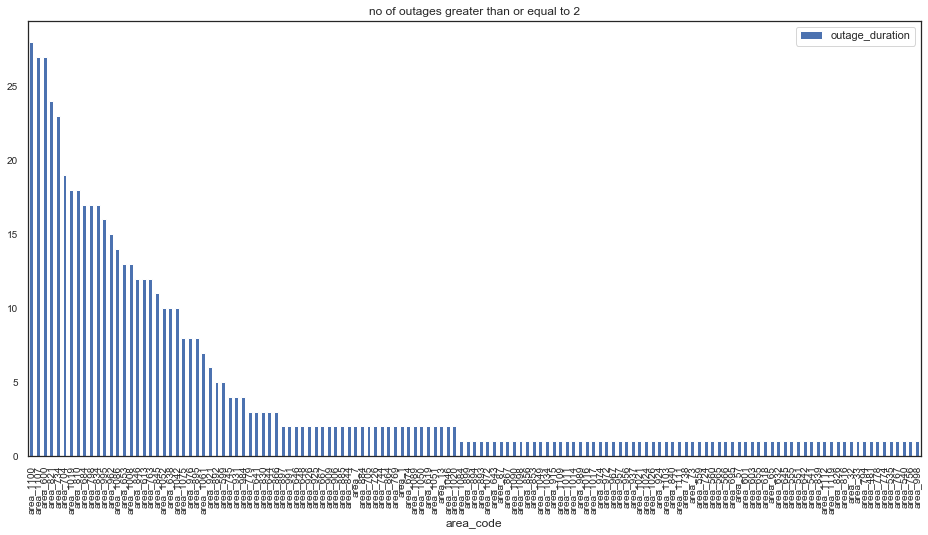

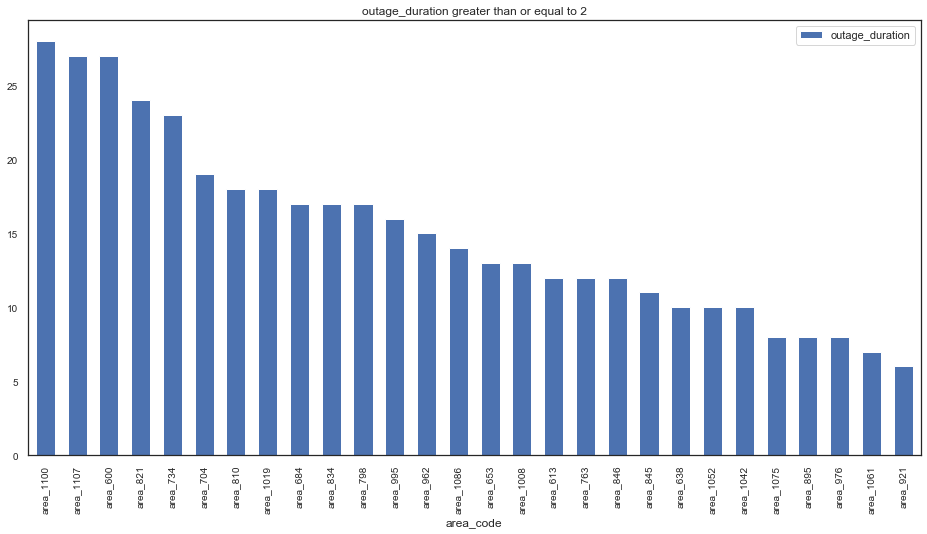

In [16]:
#sns.set(rc={'figure.figsize':(15,10)},style='white')
fig = plt.figure(figsize=(20,15))
outage_duration_2.sort_values("outage_duration", ascending= False).plot( kind = 'bar', title="no of outages greater than or equal to 2", y = "outage_duration",
                       align = 'center',  width=0.6 , figsize=(16,8),fontsize=10 )
outage_duration_2[outage_duration_2.outage_duration > 5].sort_values("outage_duration", ascending= False).plot( kind = 'bar', title="outage_duration greater than or equal to 2",
                                                            y = "outage_duration",align = 'center',  width=0.6,figsize=(16,8),fontsize=10  )

<b>***key insight - </b> 

areas 1100, 1107, 600 and 821 most prone with long duration outage

# Data Merging

In [17]:
#  Merge Train and Broadband type data and create merge_1 dataset.
merge_1 = train.merge(train_broadband_data, how = 'inner', left_on='id', right_on='id')
merge_1.shape

(6754, 4)

In [18]:
#creating cross tab to understand counts for each broadband type 
pd.crosstab(merge_1.broadband_type, merge_1.outage_duration, margins = True, margins_name = "Total" )

outage_duration,0,1,2,Total
broadband_type,,,,
broadband_type_1,7,10,10,27
broadband_type_10,19,8,1,28
broadband_type_2,2242,527,82,2851
broadband_type_3,17,23,4,44
broadband_type_4,56,41,17,114
broadband_type_5,0,0,3,3
broadband_type_6,63,112,26,201
broadband_type_7,93,77,9,179
broadband_type_8,1683,1019,544,3246


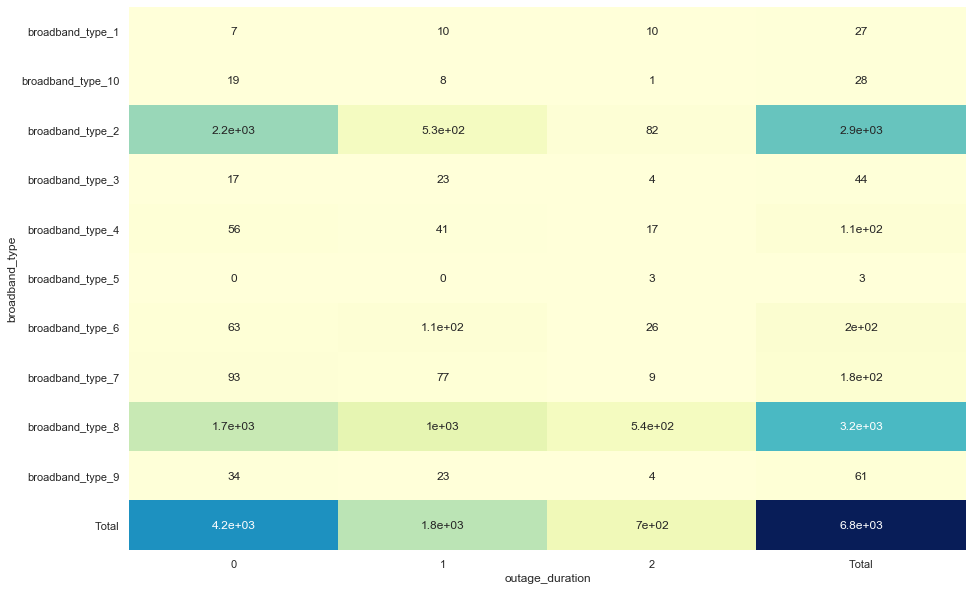

In [19]:
#calculating broadband_type with most no of outage duration
sns.set(rc={'figure.figsize':(15,10)},style='white')
sns.heatmap(pd.crosstab(merge_1.broadband_type, merge_1.outage_duration, margins = True, 
                        margins_name = "Total" ), cmap="YlGnBu", annot = True, cbar= False)

<b>***key insight - </b> 

broadband_type_2 and broadband_type_8 has most no of outage

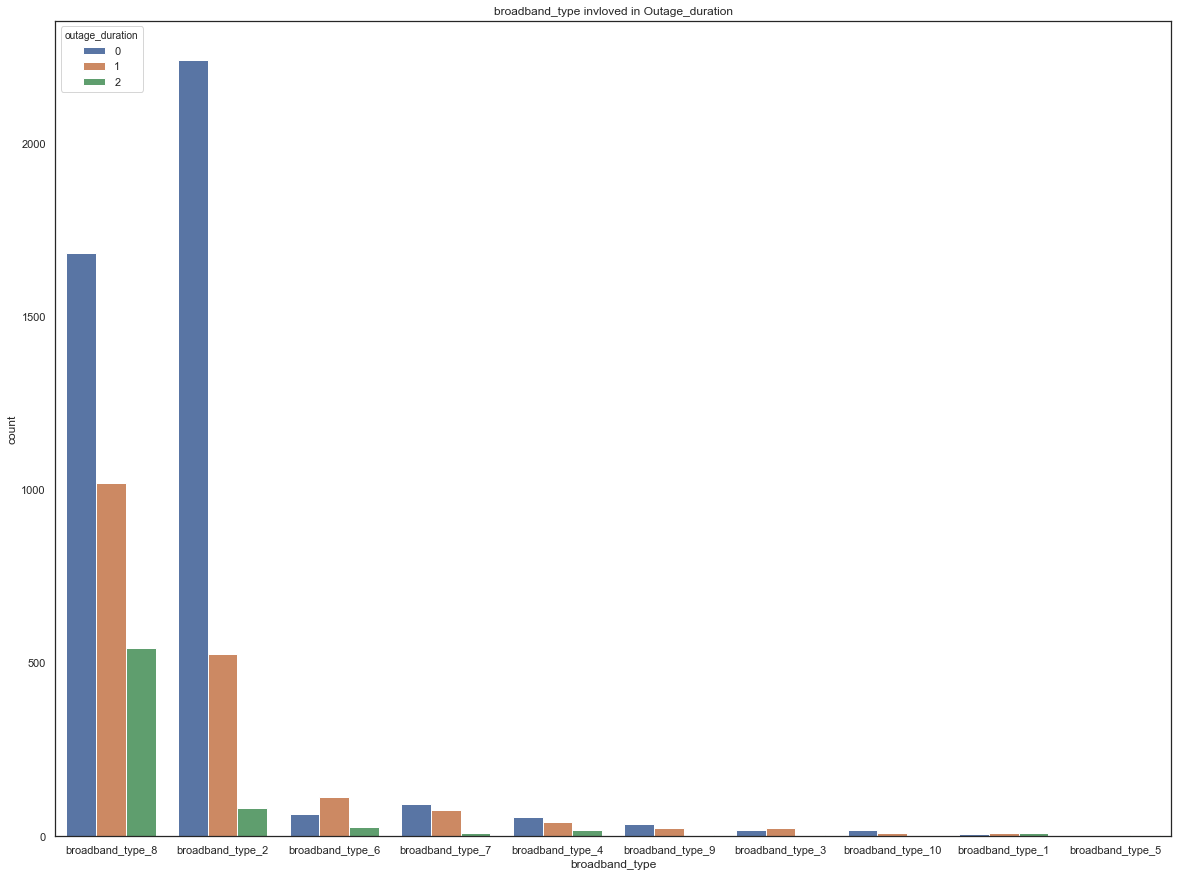

<Figure size 1440x1080 with 0 Axes>

In [20]:
## Lets plot countplot for each Broadband_type categories

sns.set(rc={'figure.figsize':(20,15)},style='white')

ax=sns.countplot(x='broadband_type',hue='outage_duration',data=merge_1
              ,order=merge_1.broadband_type.value_counts().iloc[:10].index)

plt.title('broadband_type invloved in Outage_duration')
    
plt.show()

plt.savefig('In broadband outage duration')

<b>***key insight - </b> 

broadband_type_8 has long outage durations

In [21]:
# Merge_1(Train and Broadband) and server type data and create merge_2 dataset.
merge_2 = merge_1.merge(train_server_data, how = 'inner', left_on='id', right_on='id')

In [22]:
#creating cross tab to understand counts for each transit_server_type 
server_outage = pd.crosstab(merge_2.transit_server_type, merge_2.outage_duration)
server_outage=server_outage.sort_values(2, ascending=False, )
server_outage.head()

outage_duration,0,1,2
transit_server_type,,,
transit_server_type_15,651,386,454
transit_server_type_11,1693,1108,427
transit_server_type_13,150,234,78
transit_server_type_20,393,147,61
transit_server_type_54,138,140,60


<b>***key insight - </b> 

transit_server_type 15, 11, and 13 have long outage durations

In [25]:
# Merge_2(Train, Broadband and server) and report data and create merge_3 dataset.
merge_3= merge_2.merge(train_report_data, how = 'inner', left_on='id', right_on='id')
merge_4= merge_3.merge(train_outage_data, how = 'inner', left_on='id', right_on='id')
merge_4.head(1)

,id,area_code,outage_duration,broadband_type,transit_server_type,log_report_type,volume,outage_type
0,13366,area_415,1,broadband_type_2,transit_server_type_35,log_report_type_312,1,outage_type_4


In [34]:
#calculating total server_volume using group function with Volume
server_volume = merge_4.groupby('transit_server_type' , as_index = False)['volume'].sum()
server_volume = server_volume.sort_values('volume', ascending=False) 
server_volume.head()

,transit_server_type,volume
25,transit_server_type_35,97789
24,transit_server_type_34,97115
2,transit_server_type_11,78239
6,transit_server_type_15,52170
4,transit_server_type_13,9234


<b>***key insight - </b> 

transit_server_type 35, 34, 11 and 15 having large volume compares to other Server

## Analysis of Transit Server type wrt to Volume

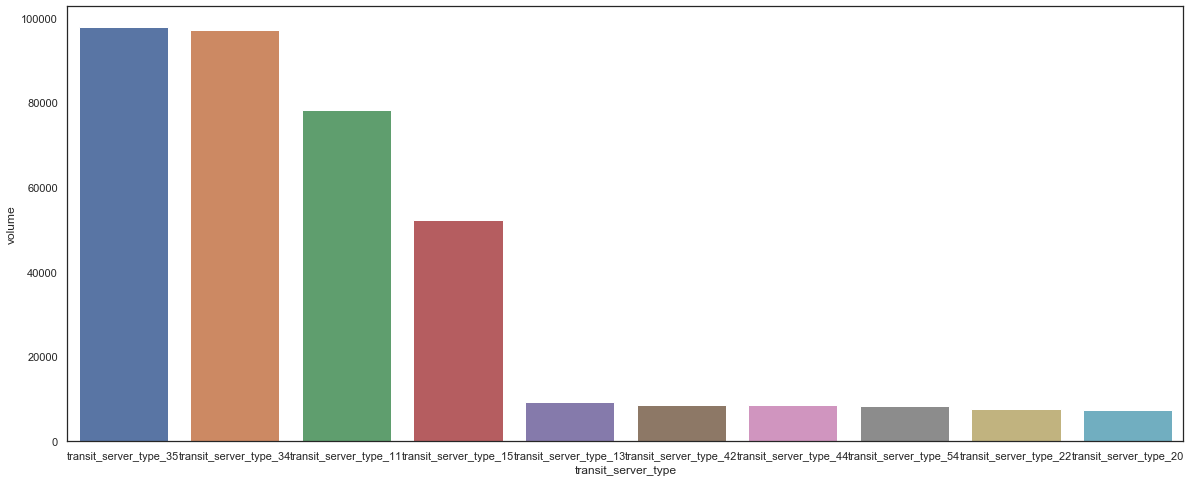

In [30]:
sns.set(rc={'figure.figsize':(20,8)},style='white')
sns.barplot(x = 'transit_server_type', y = 'volume', data = server_volume[:10])

<b>***key insight - </b> 

transit_server_type 35, 34, 11 and 15 having large volume compares to other Server

In [35]:
#calculating total area_code using groupby function with Volume
area_server = merge_4.groupby('area_code' , as_index = False)['volume'].sum()
area_server = area_server.sort_values('volume', ascending=False) 
area_server.shape

(876, 2)

## Analysis of Area Volume wrt to long Outage Duration

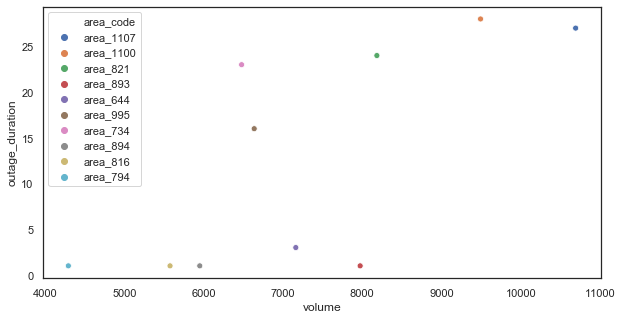

In [39]:
rcParams['figure.figsize'] = 10, 5
merge_5 = area_server.merge(outage_duration_2, how = 'inner', left_on='area_code', 
                            right_on='area_code').sort_values('volume',ascending=False)
g = sns.scatterplot(x="volume", y="outage_duration", hue ='area_code' ,data=merge_5[:10] , legend='full')

<b>***key insight - </b> 
1. Area 821 although handles slightly more data than area 893, but it has much higher long outage duration outages.
2. In genral (barring some exceptions)areas which handle more data than 8 k have higher outages. 

Further exploration -
1. Features for reports from high outages areas can be explained.


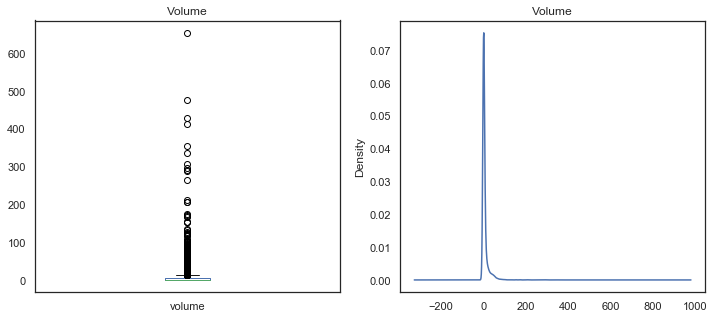

In [40]:
fig,ax = plt.subplots(nrows = 1, ncols = 2)

train_report_data.volume.loc[train_report_data.index.isin(train.id)].plot(kind = 'box',figsize = [12.0,5.0],title="Volume",ax = ax[0])

train_report_data.volume.loc[train_report_data.index.isin(train.id)].plot(kind = 'density',figsize = [12.0,5.0],title="Volume",ax = ax[1])
                                                                 

<b>***key insight - </b> 
Volume is heavily right skewed and hence we can transform the variable to reduce skewness.